# Proyek Analisis Data: Sleep Well

- **Nama:** Nenda, Rifa, Ryo



## Menentukan Pertanyaan Bisnis

- 1. Kolom apa saja yang mempengaruhi jam tidur ?
  2. Kolom apa saja yang mempengaruhi Awakenings ?


## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [23]:
df = pd.read_csv("../Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


**Insight:**
- Melihat Kolom data yang tersedia dan tipe datanya


### Assessing Data

In [24]:
#Melihat info dataframe dan jumlah duplikat
df.info()
print("Jumlah duplikat:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [25]:
#Melihat jumlah, rata2, min, dll.
df.describe(include="all")

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452,452,452,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,452,446.000000
unique,NaN,NaN,2,424,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Male,2021-03-11 01:00:00,2021-05-08 07:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,228,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298,NaN
mean,226.500000,40.285398,NaN,NaN,NaN,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,NaN,1.791480
std,130.625419,13.172250,NaN,NaN,NaN,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,NaN,1.428134
min,1.000000,9.000000,NaN,NaN,NaN,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,113.750000,29.000000,NaN,NaN,NaN,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,NaN,0.000000
50%,226.500000,40.000000,NaN,NaN,NaN,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,NaN,2.000000
75%,339.250000,52.000000,NaN,NaN,NaN,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,NaN,3.000000


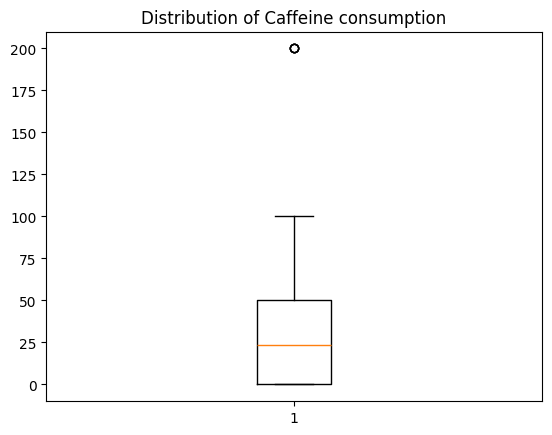

In [38]:
#Mengecek distribusi data caffeine consumption
plt.boxplot(df["Caffeine consumption"])
plt.title("Distribution of Caffeine consumption")
plt.show()

In [27]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

**Insight:**
- Tidak ada duplikat
- *Awakenings*, *Caffeine consumption*, *Alcohol consumption*, *Exercise frequency* memiliki *value* kosong.
- Bedtime, Wakeup time memiliki tipe data *object*
- Caffeine consumption memiliki outlier

### Cleaning Data

In [28]:
#Mengimputasi dengan Mean atau Median
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].mean())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())

In [29]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

**Insight:**
- sudah tidak missing value
- outlier tidak dihapus, karena bisa memberikan data


## Exploratory Data Analysis (EDA)

### Explore ...

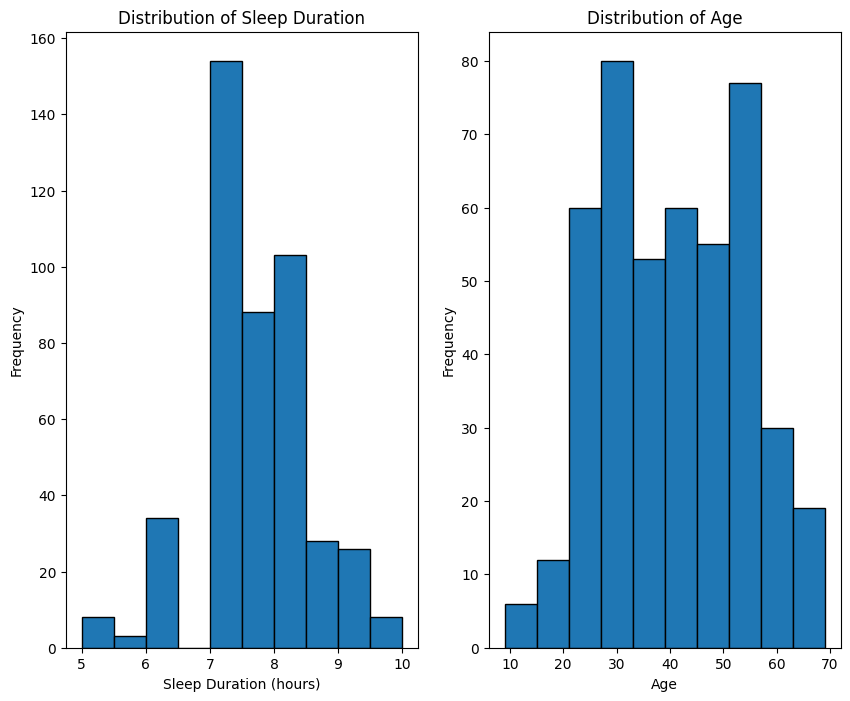

In [30]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.hist(df['Sleep duration'], bins=10, edgecolor='black')
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['Age'], edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [31]:
# Mengubah kolom kategorikal menjadi numerik
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})

In [32]:
# Mengonversi kolom Bedtime dan Wakeup time ke datetime
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

In [33]:
# Membuat kolom baru 'Time in Bed' sebagai durasi tidur dalam jam
df['Time in Bed'] = (df['Wakeup time'] - df['Bedtime']).dt.total_seconds() / 3600

In [34]:
# Menghitung korelasi setiap variabel dengan 'Sleep duration'
correlation_matrix = df.corr()
correlation_matrix['Sleep duration'].sort_values(ascending=False)

Sleep duration            1.000000
Time in Bed               0.181860
Light sleep percentage    0.041804
Wakeup time               0.030566
Bedtime                   0.029673
ID                        0.014333
Awakenings                0.004829
Smoking status            0.004211
Caffeine consumption     -0.014542
REM sleep percentage     -0.015940
Sleep efficiency         -0.027467
Deep sleep percentage    -0.037304
Gender                   -0.044376
Alcohol consumption      -0.045662
Age                      -0.062462
Exercise frequency       -0.067064
Name: Sleep duration, dtype: float64

In [35]:
# Menghitung korelasi setiap variabel dengan 'Awakenings'
correlation_matrix = df.corr()
correlation_matrix['Awakenings'].sort_values(ascending=False)

Awakenings                1.000000
Light sleep percentage    0.312734
Alcohol consumption       0.198491
Time in Bed               0.103815
Gender                    0.074205
Sleep duration            0.004829
Wakeup time              -0.014144
Bedtime                  -0.014646
Age                      -0.017468
Smoking status           -0.020781
REM sleep percentage     -0.024992
ID                       -0.055429
Caffeine consumption     -0.103769
Exercise frequency       -0.211435
Deep sleep percentage    -0.300301
Sleep efficiency         -0.554498
Name: Awakenings, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: kolom yang mempengaruhi jam tidur?

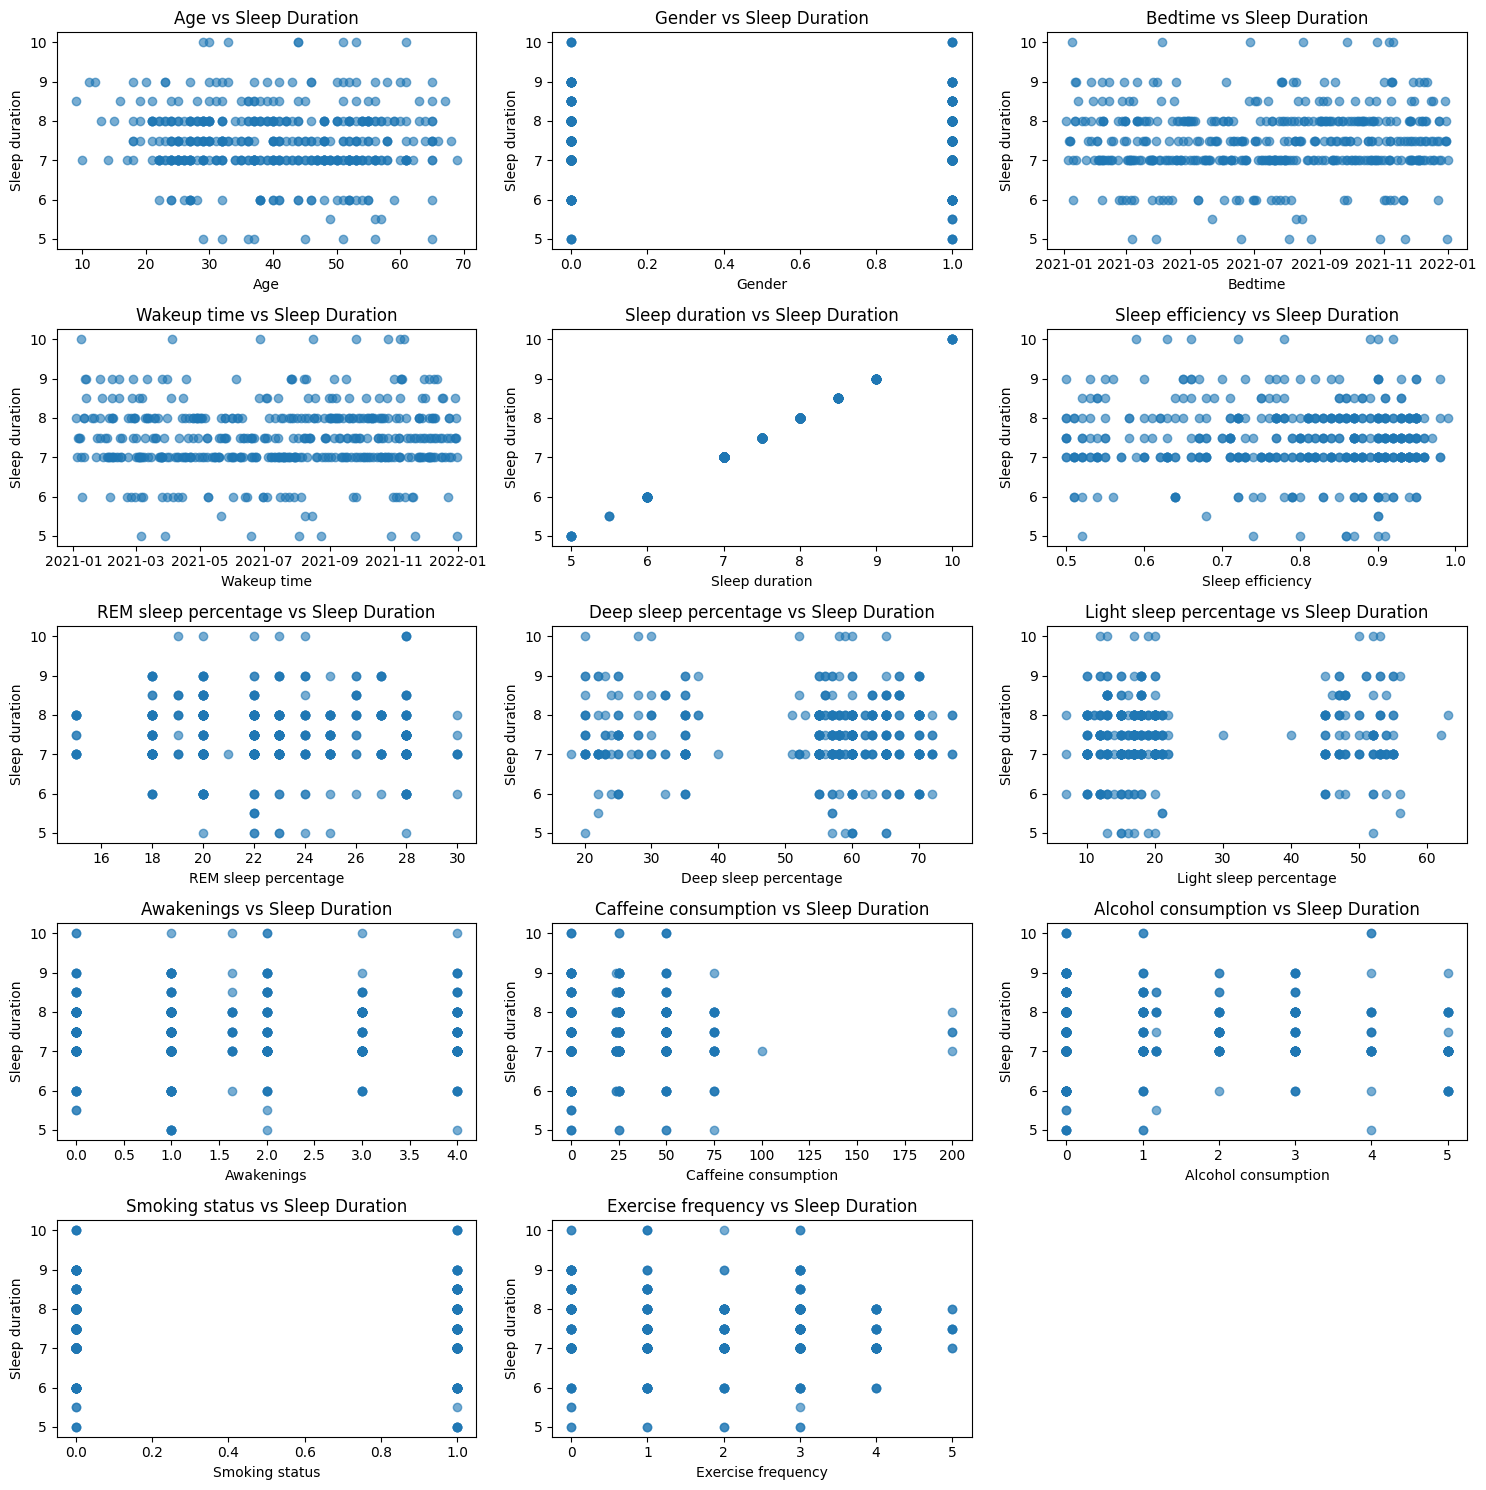

In [36]:
# Scatter plot untuk Sleep Duration
variables = ["Age", "Gender", "Bedtime", "Wakeup time", "Sleep duration",
          "Sleep efficiency", "REM sleep percentage", "Deep sleep percentage",
          "Light sleep percentage", "Awakenings", "Caffeine consumption",
          "Alcohol consumption", "Smoking status", "Exercise frequency"]

plt.figure(figsize=(15, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 3, i)
    plt.scatter(data=df, x=var, y='Sleep duration', alpha=0.6)
    plt.title(f'{var} vs Sleep Duration')
    plt.xlabel(var)
    plt.ylabel('Sleep duration')
plt.tight_layout()
plt.show()

### Pertanyaan 2: 2. Kolom apa saja yang mempengaruhi Awakenings ?

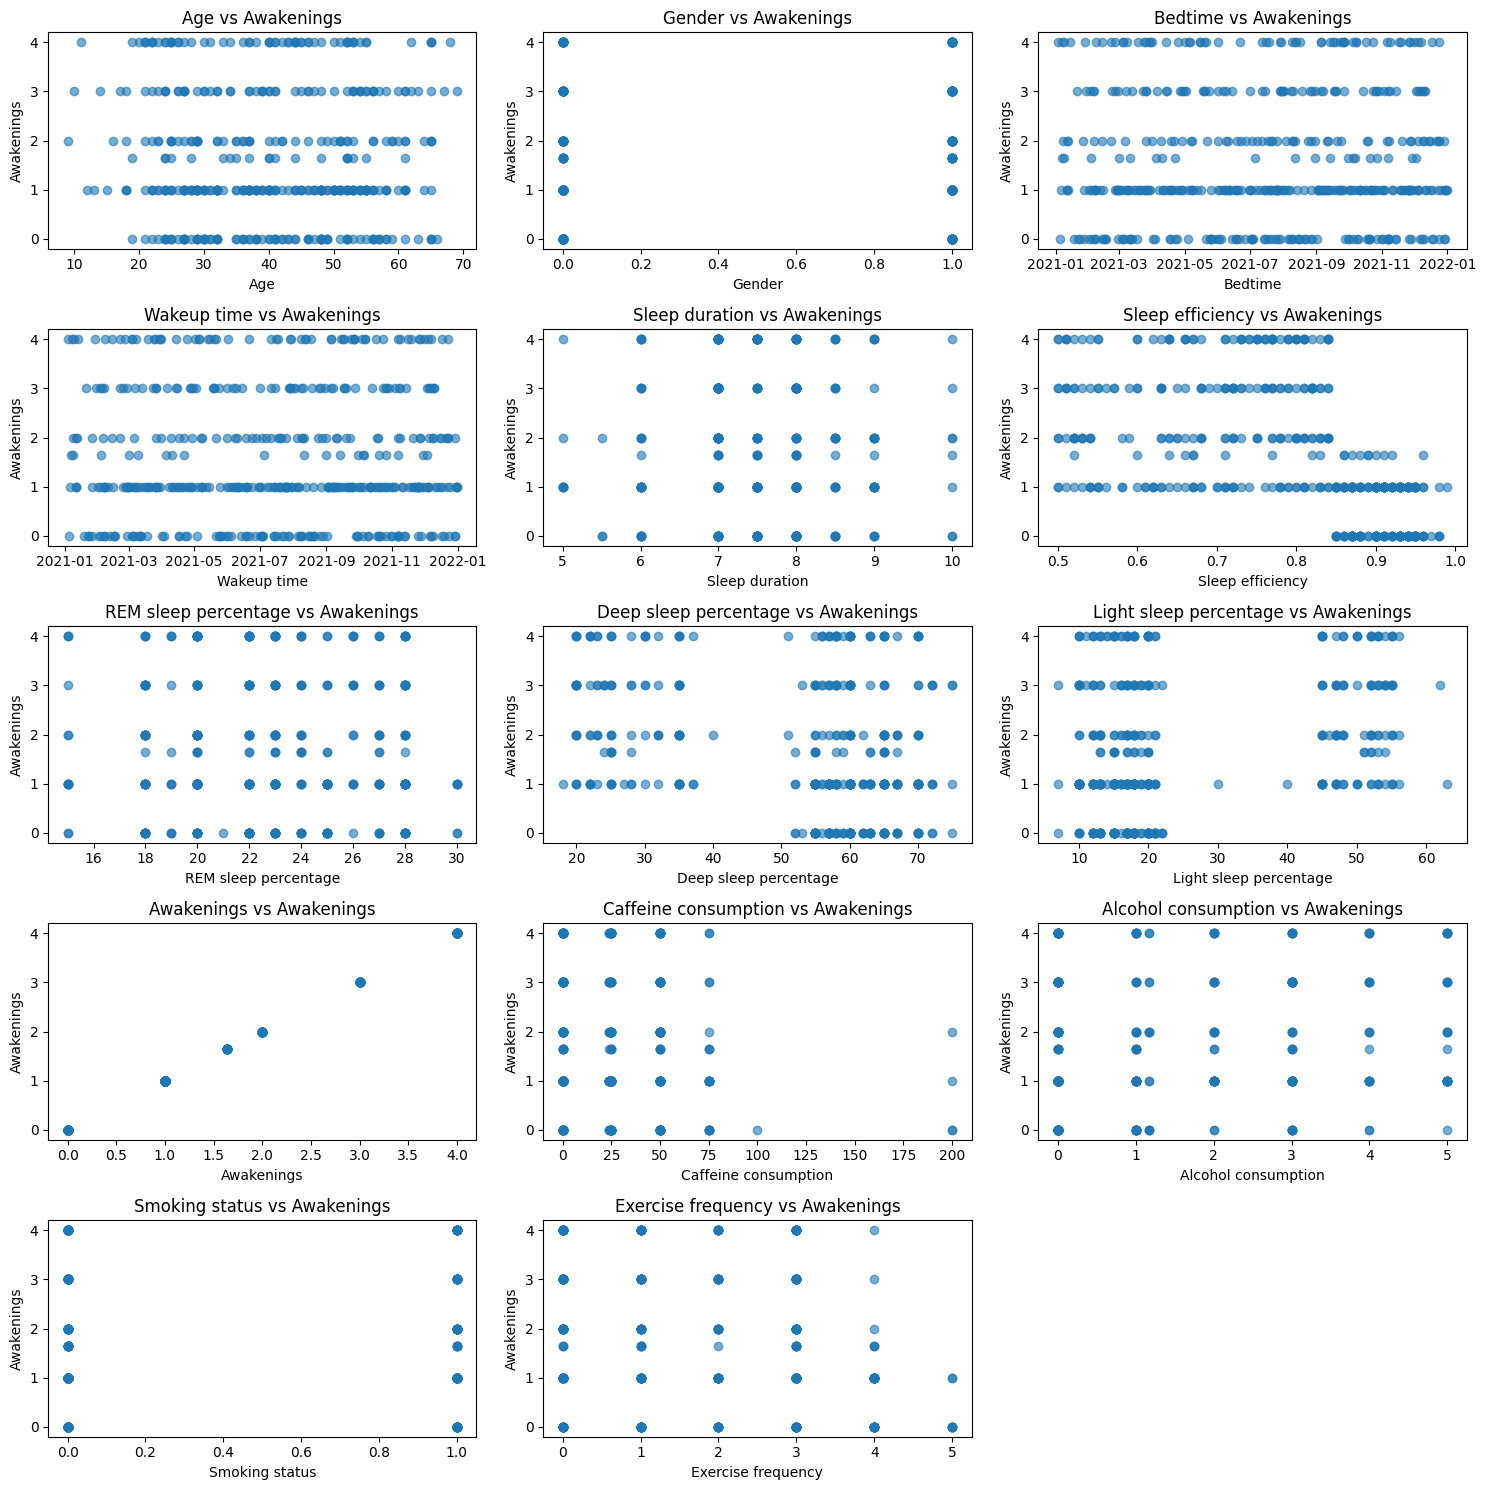

In [37]:
# Scatter plot untuk Sleep Awakenings
variables = ["Age", "Gender", "Bedtime", "Wakeup time", "Sleep duration",
          "Sleep efficiency", "REM sleep percentage", "Deep sleep percentage",
          "Light sleep percentage", "Awakenings", "Caffeine consumption",
          "Alcohol consumption", "Smoking status", "Exercise frequency"]

plt.figure(figsize=(15, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 3, i)
    plt.scatter(data=df, x=var, y='Awakenings', alpha=0.6)
    plt.title(f'{var} vs Awakenings')
    plt.xlabel(var)
    plt.ylabel('Awakenings')
plt.tight_layout()
plt.show()

**Insight:**
- Semakin tinggi sleep efficiency semakin bagus jam tidurnya
- Semakin banyak olah raga semakin bagus jam tidurnya
- Semakin tinggi deep sleep semakin bagus jam tidurnya
- Semakin rendah light sleep semakin bagus jam tidurnya
- Semakin rendah alcohol consumption semakin jam bagus tidurnya

- Semakin tinggi sleep efficiency semakin tidak terbangun
- Semakin tinggi deep sleep semakin tidak terbangun
- Semakin rendah deep sleep semakin tidak terbangun

## Conclusion

- Korelasi antara kolum dengan jam tidur sangat kecil, butuh lebih banyak data lagi
- Hanya Sleep efficiency yang mempunyai pengaruh terhadap awakening